# **TP - Grupo 4**
Pedro Paulo Costa Pereira - A88062

Tiago André Oliveira Leite - A91693

# **Problema  - Circuito**

In [1]:
import networkx as nx
from ortools.linear_solver import pywraplp
import random

In [70]:
def circuit_generator(I,Alpha):
    
    num_xors = 1#random.randint(0,I)
    num_nots = 1#random.randint(0,I)
    num_ands = int ((2*num_xors + 2*num_nots + I +1 )*Alpha // (1 - 2*Alpha))
    num_middle = num_xors + num_nots + num_ands -1
    total = I + num_xors + num_nots + num_ands + num_middle
    
    inputs = [i for i in range(I)]
    middle = [(I+i) for i in range(num_middle)]
    xors = [(I+num_middle+i) for i in range(num_xors)]
    nots = [(I+num_middle+num_xors+i) for i in range(num_nots)]
    ands = [(I+num_middle + num_xors+ num_nots + i) for i in range(num_ands)]
    
    G = nx.DiGraph()
    G.add_nodes_from(inputs,color=1)
    G.add_nodes_from(middle,color=2)
    G.add_nodes_from(xors, gate="XOR",color=3)
    G.add_nodes_from(nots, gate="NOT",color=4)
    G.add_nodes_from(ands, gates="AND", color=5)
    G.add_node(total,color=6)
    
    
    gates = xors + nots + ands 
    wires = [total] + middle
    
    orla = []
    orla.append(total)
    while orla:
        x = orla.pop()
        candidates = []
        if x in wires:
            candidates = [g for g in gates if (G.degree[g] == 0 and not nx.has_path(G,g,x))]
            if candidates:
                random.shuffle(candidates)
                selected = candidates.pop(0)
                G.add_edge(x,selected)
                orla.append(selected)
        else:
            candidates = [w for w in wires if not nx.has_path(G,w,x)]
            if candidates:
                random.shuffle(candidates)
                if x in nots:
                    selected = candidates.pop(0)
                    G.add_edge(x,selected)
                    orla.append(selected)
                elif len(candidates)>1:
                    for i in range(random.randint(2,len(candidates))):
                        selected = candidates.pop(0)
                        G.add_edge(x,selected)
                        orla.append(selected)
    
    unconected = [g for g in gates if G.out_degree(g) == 0]
    
    for g in unconected:
        candidates = [i for i in inputs]
        random.shuffle(candidates)
        if g in nots:
            selected = candidates.pop(0)
            G.add_edge(g,selected)
        else:
            for i in range(random.randint(2,len(candidates))):
                selected = candidates.pop(0)
                G.add_edge(g,selected)
            
        
                    
                   
             
        
    
    
    nx.draw(G, with_labels = True,node_size=1000, pos=nx.planar_layout(G), node_color=[G.nodes[n]['color'] for n in G])
    
    
    return G
    
    
    

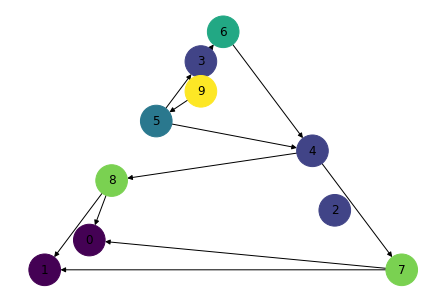

In [71]:
G = circuit_generator(2,0.2)